## Portfolio Comparison Tool
Compare portfolio to benchmark.

Usage:
<ul>
    <li>Replace portfolio tickers and weights, start and end dates, and comparative index with desired metrics.</li>
    <li>Run and save HTML output</li>
</ul> 


Comparison report generated: Portfolio vs SPY


[*********************100%***********************]  6 of 6 completed


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-01-03   2020-01-03
End Period                 2024-12-31   2024-12-31
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          94.58%       374.78%
CAGR﹪                     9.63%        24.01%

Sharpe                     0.74         1.16
Prob. Sharpe Ratio         94.84%       99.48%
Smart Sharpe               0.66         1.03
Sortino                    1.04         1.68
Smart Sortino              0.92         1.49
Sortino/√2                 0.73         1.19
Smart Sortino/√2           0.65         1.05
Omega                      1.22         1.22

Max Drawdown               -33.72%      -41.82%
Longest DD Days            708          569
Volatility (ann.)          21.0%        31.24%
R^2                        0.74         0.74
Information Ratio          0.08         0.08
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-22,2023-01-05,2023-06-13,569,-41.824862,-40.623635
2,2020-02-20,2020-03-16,2020-05-08,79,-28.305731,-27.031981
3,2024-07-11,2024-08-05,2024-11-06,119,-17.272825,-17.125525
4,2020-09-03,2020-09-23,2021-01-20,140,-16.037697,-15.762754
5,2021-02-17,2021-03-08,2021-04-07,50,-11.747955,-9.721268


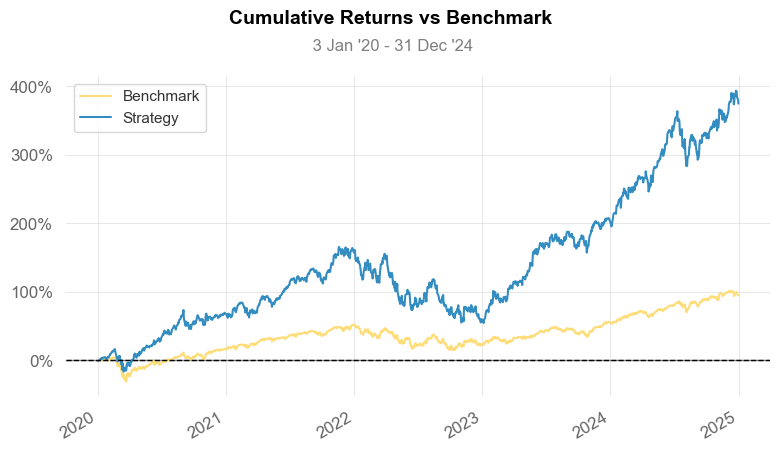

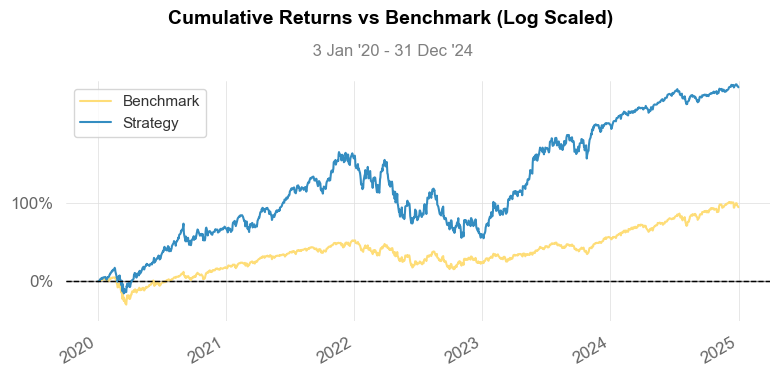

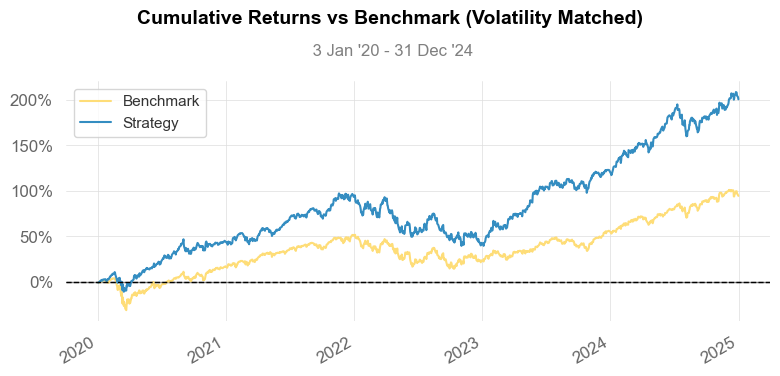

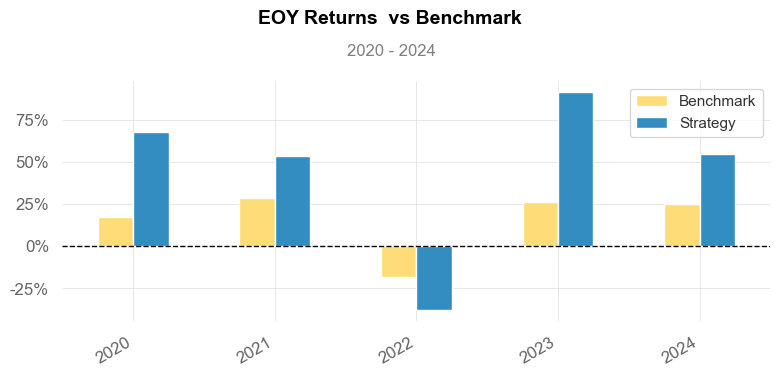

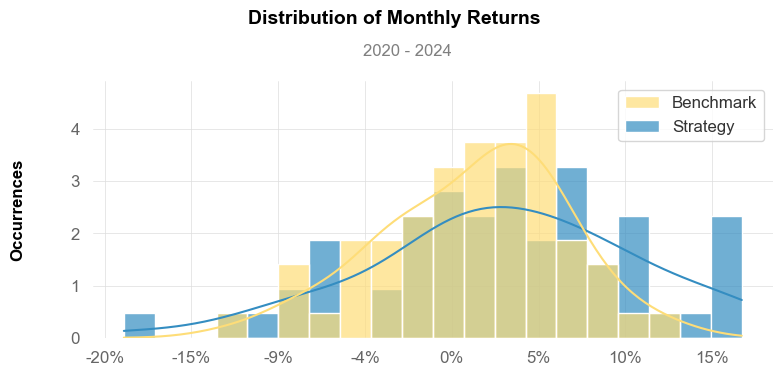

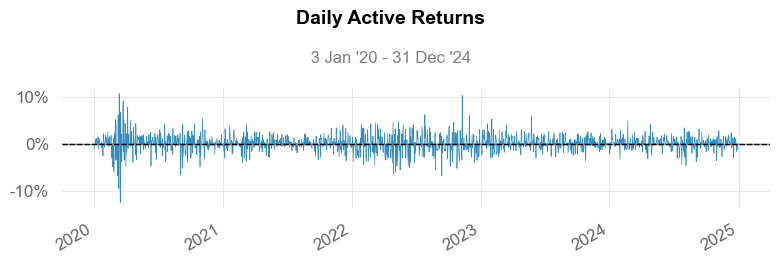

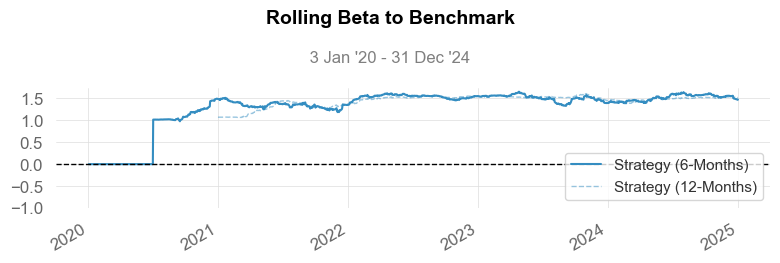

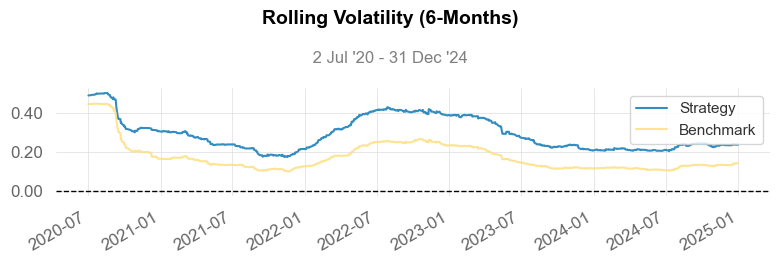

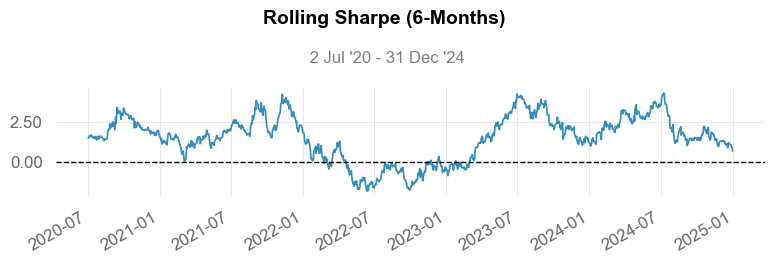

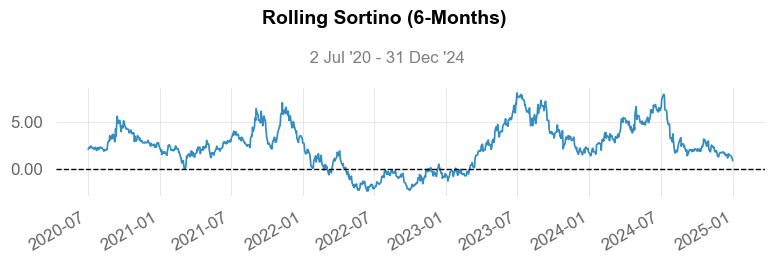

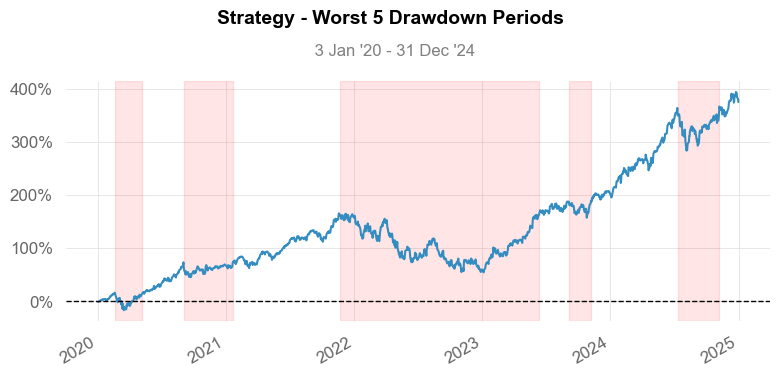

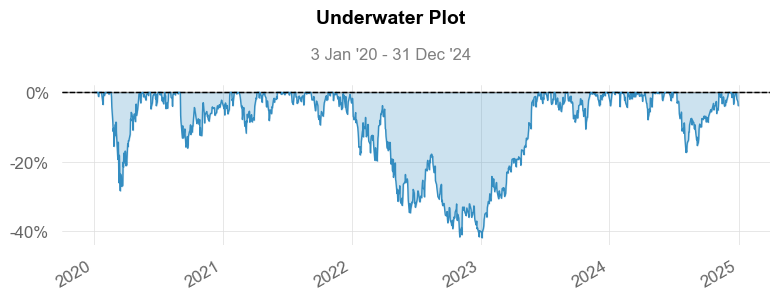

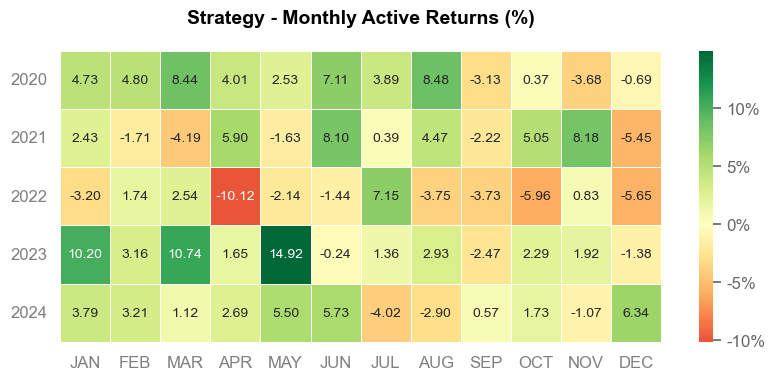

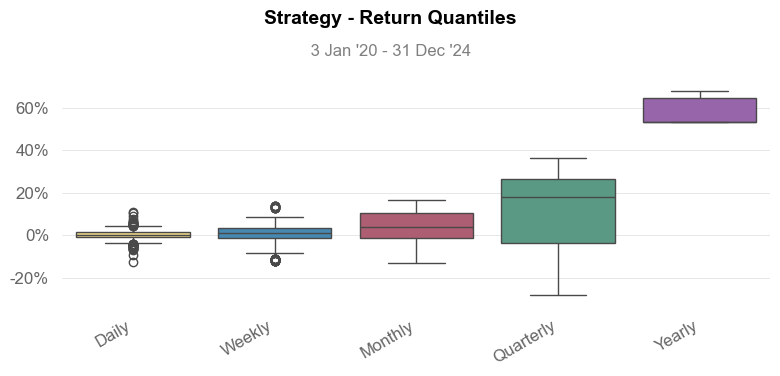

In [3]:
import yfinance as yf
import pandas as pd
import quantstats as qs
qs.extend_pandas()
import warnings
warnings.filterwarnings('ignore')

# Define tickers and weights for the custom portfolio
tickers = {
    'NVDA': 0.2,
    'AAPL': 0.2,
    'AMZN': 0.2,
    'MSFT': 0.2,
    'GOOG': 0.2
}

start_date = "2020-01-01"
end_date = "2025-01-01"
comparative_index = 'SPY'

print("Comparison report generated: Portfolio vs " + comparative_index)

# Download historical price data for portfolio and SPY
data = yf.download(list(tickers.keys()) + [comparative_index], start=start_date, end=end_date)['Close']

# Calculate daily returns
returns = data.pct_change()

# Create portfolio returns
weights = pd.Series(tickers)
portfolio_returns = (returns[list(tickers.keys())] * weights).sum(axis=1)

# SPY returns
comp_returns = returns[comparative_index]

# Align portfolio and SPY returns
portfolio_returns, spy_returns = portfolio_returns.align(comp_returns, join='inner')

# Generate the quantstats report
qs.reports.full(portfolio_returns, benchmark=comp_returns)